In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools
import scipy.stats as stats

In [ ]:
series=pd.read_csv('AirPassengers.csv')
series

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
series['Month']=pd.to_datetime(series['Month'])
series.set_index('Month',inplace=True)

In [ ]:
def testenormal(x):
    e,p=stats.shapiro(x)
    texto='A série NÃO é normal'
    if p>=0.05:
        texto='A série É normal'
    return texto

In [ ]:
def testeestacionario(x):
    kpssx=statsmodels.tsa.stattools.kpss(x)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste>valorcritico:
        texto='A série NÃO estacionária'
    else:
        texto='A série É estacionária'
    return texto

In [ ]:
testenormal(series)

'A série NÃO é normal'

In [ ]:
testeestacionario(series)

<ipython-input-5-0420f8ca529a>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

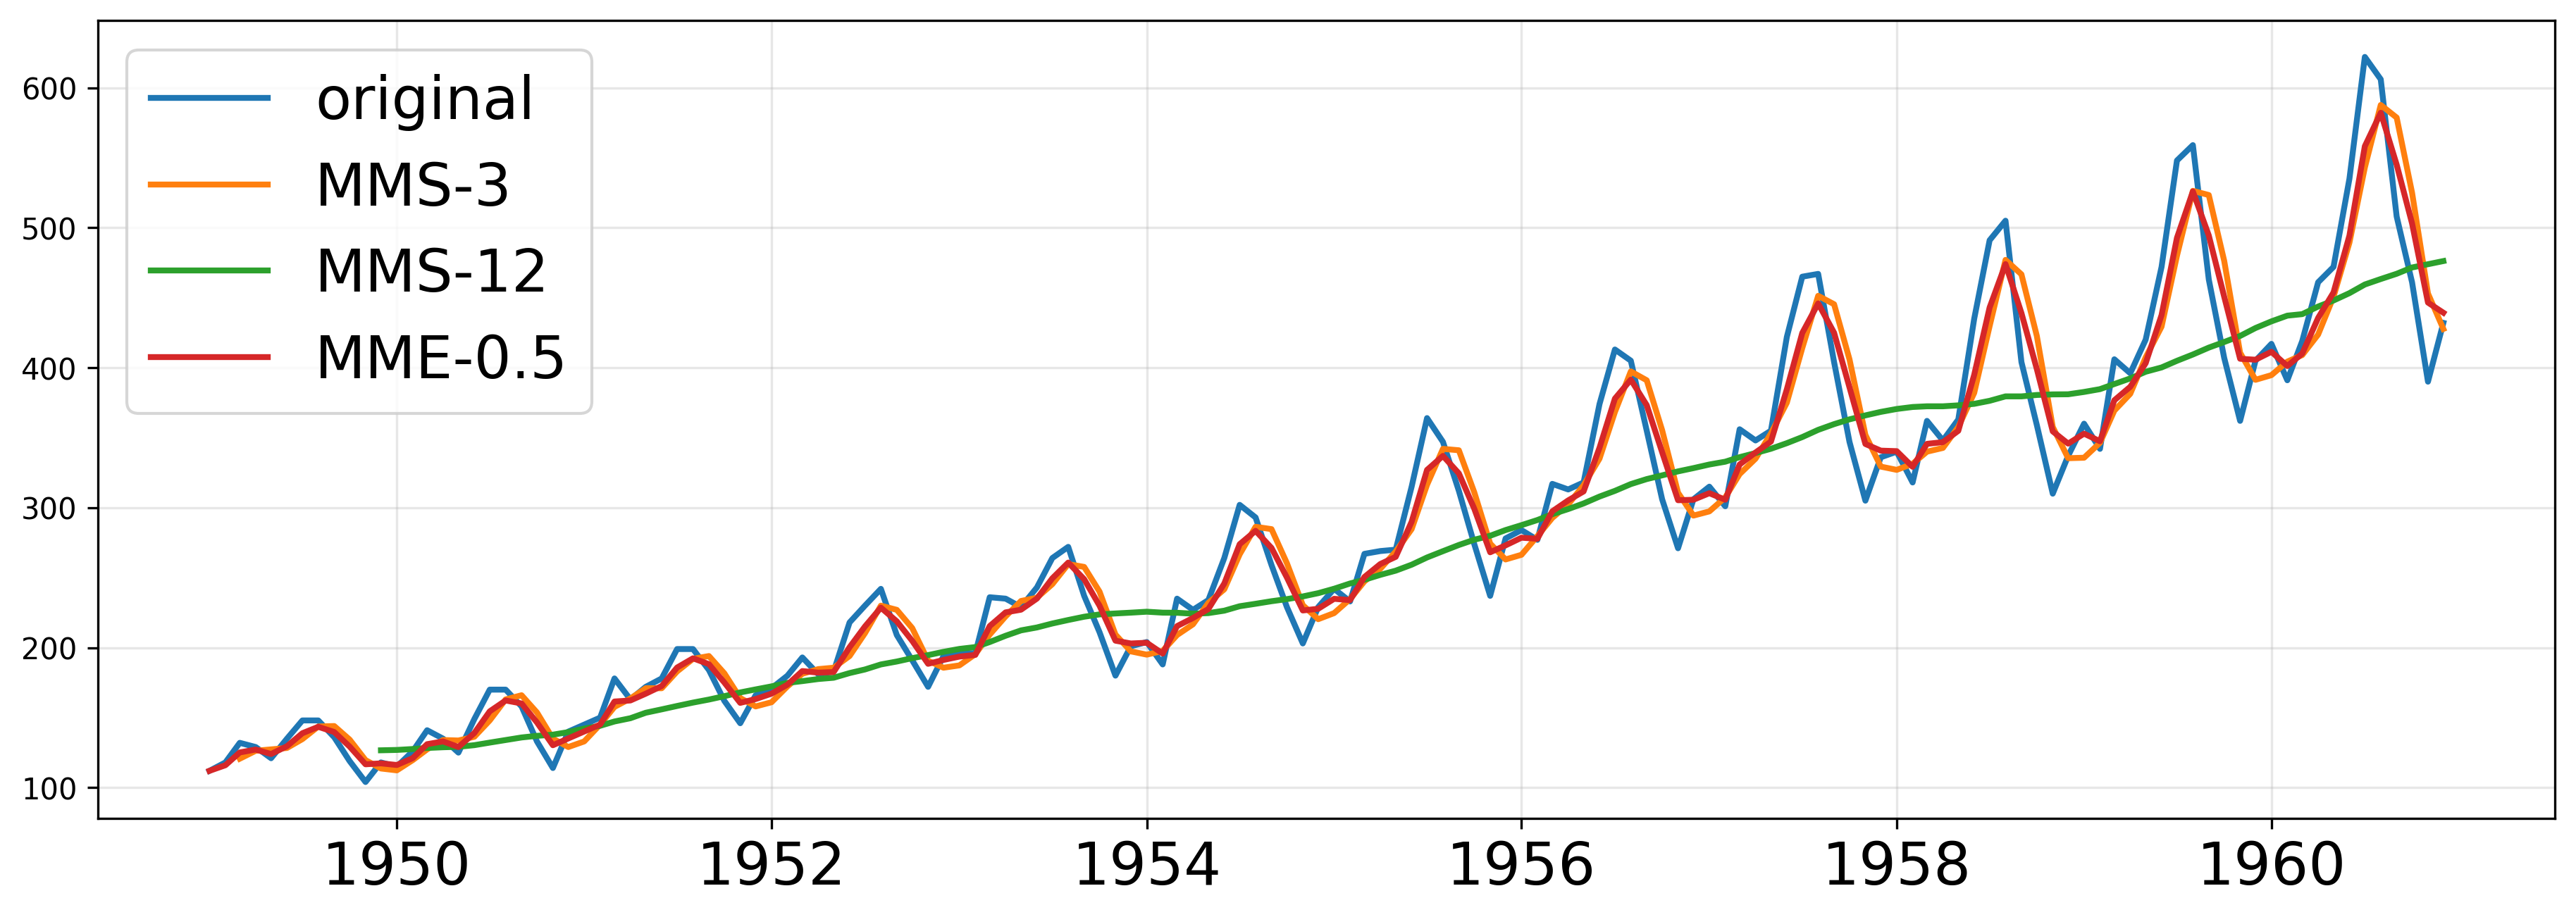

In [ ]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(series,label='original',lw=2)
plt.plot(series.rolling(3).mean(),label='MMS-3',lw=2)
plt.plot(series.rolling(12).mean(),label='MMS-12',lw=2)
plt.plot(series.ewm(alpha=0.5).mean(),label='MME-0.5',lw=2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(alpha=0.3)

# Machine Learning

In [ ]:
MMS10=series.rolling(10).mean()
MMS10.columns=["MMS10"]
EXP05=series.ewm(alpha=0.5).mean()
EXP05.columns=["EXP05"]
seriesall=pd.concat([series,MMS10,EXP05],axis=1)
seriesall['MESES']=np.arange(len(seriesall))
seriesall

,#Passengers,MMS10,EXP05,MESES
Month,,,,
1949-01-01,112,NaN,112.000000,0
1949-02-01,118,NaN,116.000000,1
1949-03-01,132,NaN,125.142857,2
1949-04-01,129,NaN,127.200000,3
1949-05-01,121,NaN,124.000000,4
...,...,...,...,...
1960-08-01,606,469.0,582.096411,139
1960-09-01,508,483.6,545.048205,140
1960-10-01,461,489.2,503.024103,141


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Modelo 1

In [ ]:
X=seriesall.dropna(axis=0)[['MESES']].values
y=seriesall.dropna(axis=0)[['#Passengers']].values
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)
modelo=XGBRegressor()
modelo.fit(Xtrain,ytrain)
print(mean_absolute_error(modelo.predict(Xtest),ytest) )

24.1785633738448


In [ ]:
dferro=pd.DataFrame({'VALOR_REAL':ytest.reshape(1,-1)[0],'VALOR_PRED':modelo.predict(Xtest)})
dferro['ERRO']=abs(dferro['VALOR_PRED']-dferro['VALOR_REAL'])
dferro

,VALOR_REAL,VALOR_PRED,ERRO
0,336,340.091370,4.091370
1,270,269.007446,0.992554
2,491,504.364471,13.364471
3,172,178.006393,6.006393
4,235,229.402664,5.597336
5,229,241.857208,12.857208
6,133,114.483727,18.516273
7,337,310.417114,26.582886
8,419,460.713013,41.713013
9,535,621.527039,86.527039


In [ ]:
dferro.mean()

VALOR_REAL    279.463415
VALOR_PRED    281.065887
ERRO           24.178563
dtype: float64

# Modelo 2

In [ ]:
X=seriesall.dropna(axis=0)[['MESES']].values
y=seriesall.dropna(axis=0)[['#Passengers']].values
Xtrain=X[0:100]
ytrain=y[0:100]
Xtest=X[101:]
ytest=y[101:]
#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)
modelo=XGBRegressor()
modelo.fit(Xtrain,ytrain)
print(mean_absolute_error(modelo.predict(Xtest),ytest) )

96.38623585420497


In [ ]:
dferro=pd.DataFrame({'VALOR_REAL':ytest.reshape(1,-1)[0],'VALOR_PRED':modelo.predict(Xtest)})
dferro['ERRO']=abs(dferro['VALOR_PRED']-dferro['VALOR_REAL'])
dferro

,VALOR_REAL,VALOR_PRED,ERRO
0,362,339.895599,22.104401
1,348,339.895599,8.104401
2,363,339.895599,23.104401
3,435,339.895599,95.104401
4,491,339.895599,151.104401
5,505,339.895599,165.104401
6,404,339.895599,64.104401
7,359,339.895599,19.104401
8,310,339.895599,29.895599
9,337,339.895599,2.895599


In [ ]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(series,label='original',lw=2)
plt.plot(series.rolling(3).mean(),label='MMS-3',lw=2)
plt.plot(series.rolling(12).mean(),label='MMS-12',lw=2)
plt.plot(series.ewm(alpha=0.5).mean(),label='MME-0.5',lw=2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(alpha=0.3)

In [ ]:
xtrain

array([[  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
      

In [ ]:
seriesfinal=seriesall['#Passengers'].reset_index(drop=True).to_frame()

In [ ]:
df=pd.DataFrame()
nsplit=3
for i in range(nsplit+1):
    if i<nsplit:
        coluna=f'T_{i}'
        df[coluna]=seriesfinal['#Passengers'].shift(-i).values
    if i==nsplit:
        coluna='TARGET'
        df[coluna]=seriesfinal['#Passengers'].shift(-i).values

In [ ]:
df

,T_0,T_1,T_2,TARGET
0,112,118.0,132.0,129.0
1,118,132.0,129.0,121.0
2,132,129.0,121.0,135.0
3,129,121.0,135.0,148.0
4,121,135.0,148.0,148.0
...,...,...,...,...
139,606,508.0,461.0,390.0
140,508,461.0,390.0,432.0
141,461,390.0,432.0,NaN
142,390,432.0,NaN,NaN


In [ ]:
# Verificar variação no nsplit
npredicao=80
seriesfinal=seriesall['#Passengers'].reset_index(drop=True).to_frame()

for n in range(npredicao):

    df=pd.DataFrame()
    nsplit=4
    for i in range(nsplit+1):
        if i<nsplit:
            coluna=f'T_{i}'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
        if i==nsplit:
            coluna='TARGET'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values



    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

    df=df.dropna(axis=0)
    X=df.drop('TARGET',axis=1).values
    Y=df[['TARGET']].values
    model=XGBRegressor()
    model.fit(X,Y)
    #fazendo predicao
    ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))

    daux=pd.DataFrame([ultimalinha],columns=df.columns)
    df=pd.concat([df,daux],ignore_index=True)

    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

    seriesfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values)+list(df['TARGET'].values),columns=['#Passengers'])

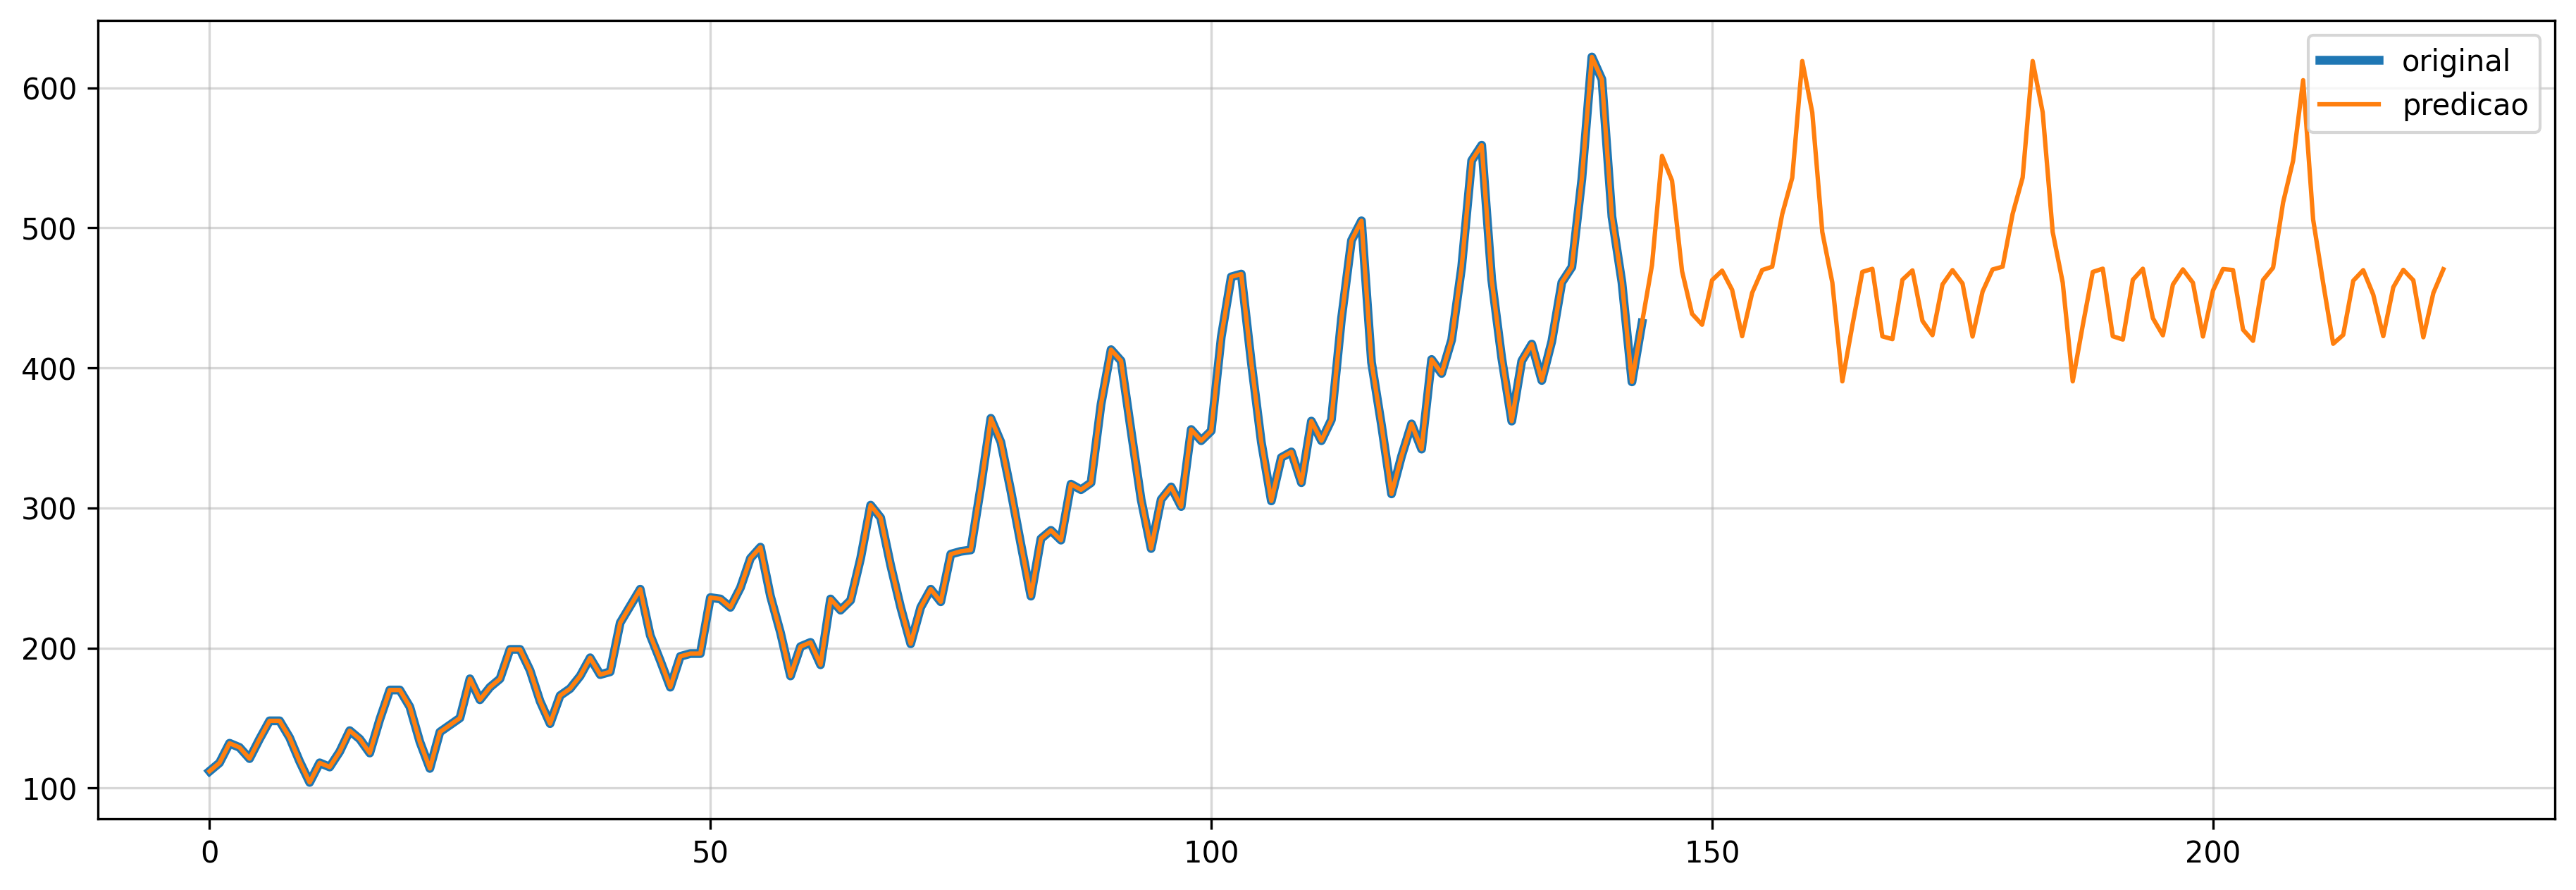

In [ ]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(seriesall['#Passengers'].values,lw=3,label='original')
plt.plot(seriesfinal,label='predicao')
plt.legend()
plt.grid(alpha=0.5)